<a href="https://colab.research.google.com/github/JoshuaBarsky/Projects/blob/main/Chessboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Chess from scratch**

Everything is created by Python Image Library (PIL) <u>per-pixel</u> manipulations using algebraic equations to create geometric shapes.

https://en.wikipedia.org/wiki/Python_Imaging_Library



This chess game will contain:


*   Board created from scratch.
*   Chess pieces created from scratch.
*   Numbered positions (A1, B1, B2, etc.)
*   Allow only certain possible moves.
*   Simple interface to play.
*   Score keeping.
*   AI vs player.




In [145]:
import numpy as np
from PIL import Image

In [178]:
positions = np.zeros((8,8))
#0 = Empty
#1 = Pawn
#3 = Rook
#4 = Knight
#5 = Bishop
#6 = Queen
#7 = King
for i in range(8):
  positions[1][i] = 1 #pawn
positions[0][3] = 6 #queen
positions[0][4] = 7 #king


In [179]:
def boardImage(positions):
  pixels = np.random.randint(0,256,(721,721,3), dtype = np.uint8)


  for i in range(len(pixels)):
    for k in range(len(pixels)):
      pixels[i][k] = (230,230,230)
    for j in range(9):
      pixels[i][j*90] = (0,0,0)

  for i in range(9):
    for j in range(len(pixels)):
      pixels[i*90][j] = (0,0,0)

  for i in range(len(positions)):
    for j in range(len(positions)):
      if positions[i][j] == 0.0:
        pixels = drawEmpty(i,j, pixels)
      if positions[i][j] == 1.0:
        pixels = drawPawn(i,j, pixels)
      if positions[i][j] == 6.0:
        pixels = drawQueen(i,j, pixels)
      if positions[i][j] == 7.0:
        pixels = drawKing(i,j, pixels)

  return pixels

In [180]:
def drawEmpty(i,j, pixels):
  pixels[i*90+45][j*90+45] = 0
  return pixels

In [181]:
def drawPawn(i, j, pixels):
  for k in range(-10, 11, 1):
    y = np.sqrt(10**2 - k**2)
    pixels[i*90+45-int(y)][j*90+45+k] = 0
  for k in range(-10, 11, 1):
    y = np.sqrt(10**2 - k**2)
    pixels[i*90+45+int(y)][j*90+45+k] = 0
  return pixels

In [182]:
def drawQueen(i,j,pixels): #draws queen symbol
  #y = sqrt(r^2 - x^2)
  for k in range(-17, 18, 1):  #makes curve of crown
    y = np.sqrt(20**2 - k**2)
    pixels[i*90+45-int(y)+20][j*90+45+k] = 0
  for k in range(-17, 18, 1):  #makes curve of crown
    y = np.sqrt(20**2 - k**2)
    pixels[i*90+45-int(y)+22][j*90+45+k] = 0

  for k in range(-17, 18, 1): #makes spikes of the crown
    y = np.sqrt(20**2 - k**2)
    if k%4 == 0:
      for u in range(13):
        pixels[i*90+45-int(y)+20-u][j*90+45+k] = 0
  return pixels

In [183]:
def drawKing(i,j,pixels): #draws King symbol
  #y = sqrt(r^2 - x^2)
  for k in range(-17, 18, 1):  #makes curve of crown
    y = np.sqrt(20**2 - k**2)
    pixels[i*90+45-int(y)+20][j*90+45+k] = 0


  for k in range(-17, 18, 1): #makes spikes of the crown
    y = np.sqrt(20**2 - k**2)
    if k%8 == 0:
      for u in range(11):
        pixels[i*90+45-int(y)+20-u][j*90+45+k] = 0
  return pixels

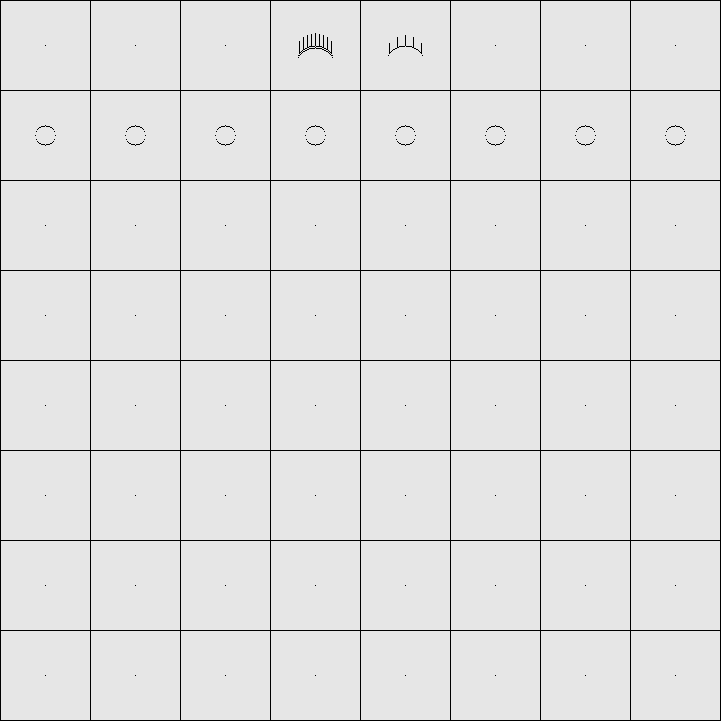

In [184]:
img = Image.fromarray(boardImage(positions))
display(img)
img.save('dots.png')